In [ ]:
                                                Regresión Lineal: Vehicle Dataset

In [120]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import r2_score, root_mean_squared_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest, f_regression

In [6]:
df1 = pd.read_csv("C:/Users/RICARDO/Desktop/archive/car data.csv")

In [8]:
df2 = pd.read_csv("C:/Users/RICARDO/Desktop/archive/CAR DETAILS FROM CAR DEKHO.csv")

In [10]:
df3 = pd.read_csv("C:/Users/RICARDO/Desktop/archive/Car details v3.csv")

In [12]:
df4 = pd.read_csv("C:/Users/RICARDO/Desktop/archive/Car details v4.csv")

In [16]:
df1.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [18]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [20]:
df1.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [22]:
df1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [24]:
df1.shape

(301, 9)

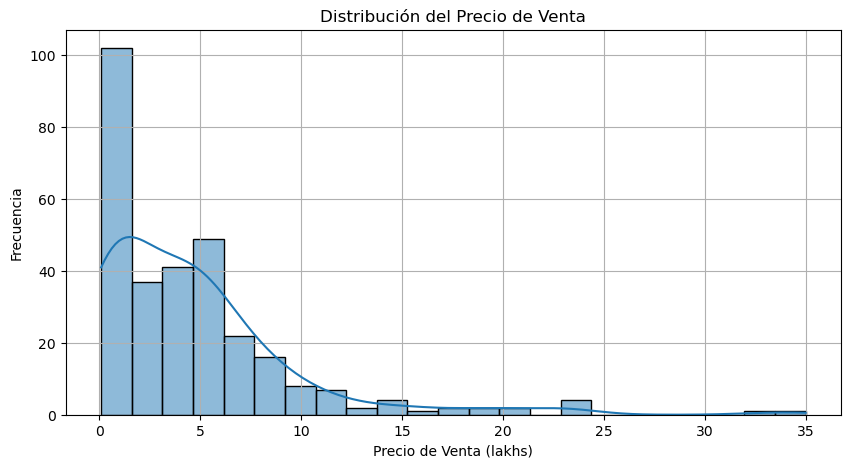

In [26]:
plt.figure(figsize=(10, 5))
sns.histplot(df1['Selling_Price'], kde=True)
plt.title('Distribución del Precio de Venta')
plt.xlabel('Precio de Venta (lakhs)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

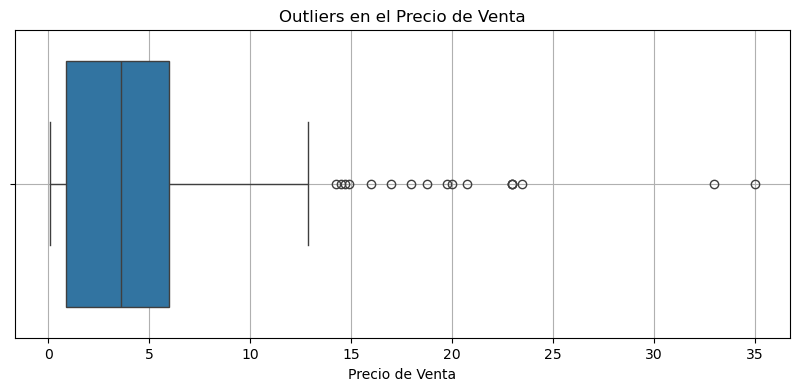

In [28]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df1['Selling_Price'])
plt.title('Outliers en el Precio de Venta')
plt.xlabel('Precio de Venta')
plt.grid(True)
plt.show()

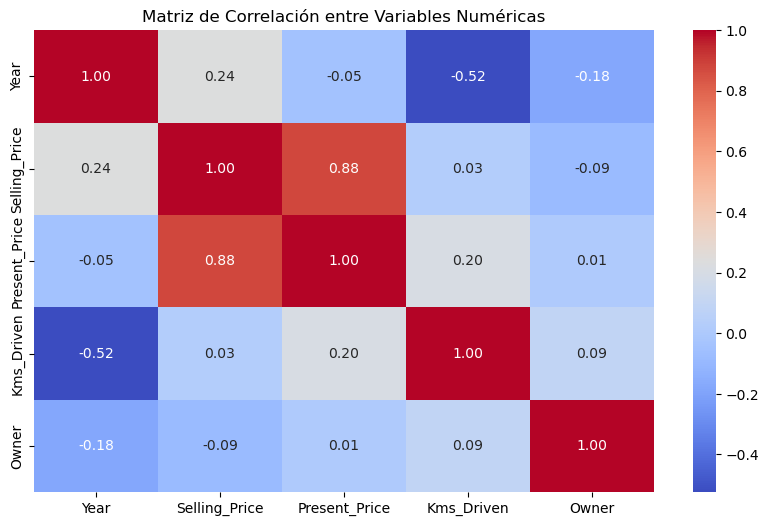

In [30]:
plt.figure(figsize=(10, 6))
sns.heatmap(df1.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()

In [32]:
df1.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [ ]:
df = df1.copy()

In [34]:
df = pd.get_dummies(df, drop_first=True)

In [36]:
df = df[df['Present_Price'] < 40]
df = df[df['Kms_Driven'] < 250000]

In [ ]:
eliminacion de algunos valores atipocos que pueden afectar la regresion lineal

In [96]:
df1 = pd.read_csv("C:/Users/RICARDO/Desktop/archive/car data.csv")

In [98]:
le = LabelEncoder()
df1['Fuel_Type'] = le.fit_transform(df1['Fuel_Type'])
df1['Seller_Type'] = le.fit_transform(df1['Seller_Type'])
df1['Transmission'] = le.fit_transform(df1['Transmission'])

In [100]:
df1['Car_Age'] = 2025 - df1['Year']
df1.drop(['Year'], axis=1, inplace=True)

In [102]:
X = df1.drop(['Selling_Price', 'Car_Name'], axis=1)
y = df1['Selling_Price']

In [ ]:
usando selectKBest para seleccionar las características, se imprime el resultado 

In [108]:
selector = SelectKBest(score_func=f_regression, k='all')
X_new = selector.fit_transform(X, y)

In [106]:
feature_scores = pd.DataFrame({
    'Característica': X.columns,
    'Puntaje': selector.scores_
}).sort_values(by='Puntaje', ascending=False)

print("Puntuación de las características más relevantes:")
print(feature_scores)

Puntuación de las características más relevantes:
  Característica      Puntaje
0  Present_Price  1015.923320
3    Seller_Type   130.164012
2      Fuel_Type   104.812250
4   Transmission    46.577926
6        Car_Age    17.657642
5          Owner     2.351956
1     Kms_Driven     0.254931


In [114]:
X = df1.drop(['Selling_Price'], axis=1)
y = df1['Selling_Price']

In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
print("Tamaño de datos de entrenamiento:", X_train.shape)
print("Tamaño de datos de prueba:", X_test.shape)

Tamaño de datos de entrenamiento: (240, 8)
Tamaño de datos de prueba: (61, 8)


In [40]:
y = df['Selling_Price']

In [62]:
X = df.drop(['Selling_Price', 'Present_Price'], axis=1)

In [50]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [64]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(X_train, y_train)

LinearRegression()

In [56]:
from sklearn.metrics import r2_score, root_mean_squared_error

y_pred = modelo.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

R² Score: 0.22822489808575297
RMSE: 4.967028000903721


R² Score: 0.22822489808575297
RMSE: 4.967028000903721


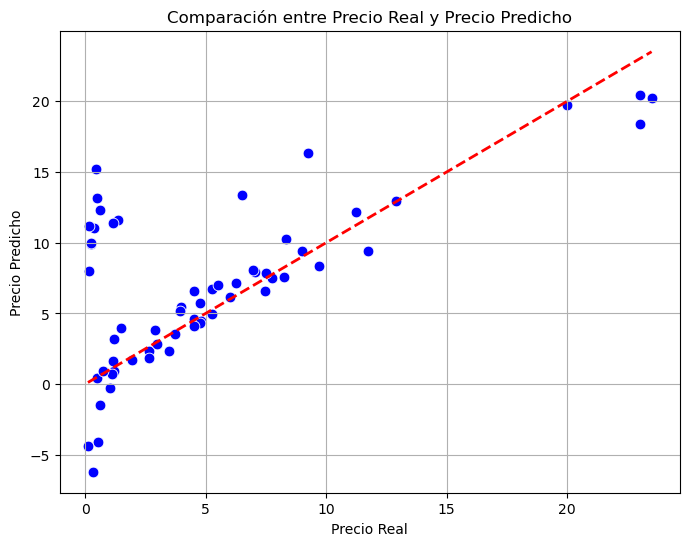

In [58]:
y_pred = modelo.predict(X_test)

print("R² Score:", r2_score(y_test, y_pred))
print("RMSE:", root_mean_squared_error(y_test, y_pred))

plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred, color='blue', s=60)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)  # línea perfecta
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.title("Comparación entre Precio Real y Precio Predicho")
plt.grid(True)
plt.show()


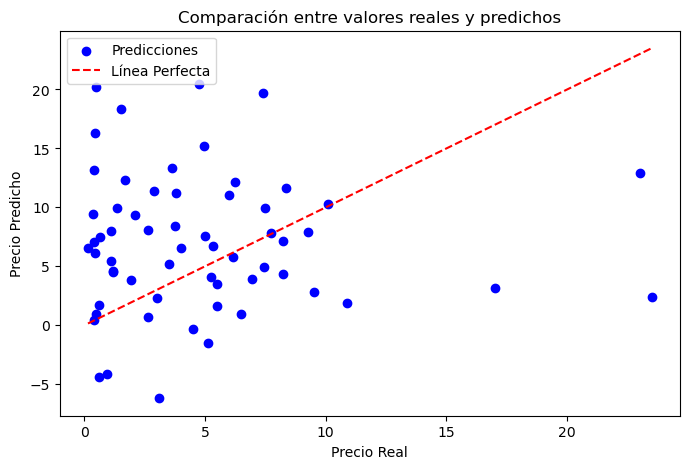

In [124]:
min_len = min(len(y_test), len(y_pred))
y_test_trim = y_test[:min_len]
y_pred_trim = y_pred[:min_len]

plt.figure(figsize=(8,5))
plt.scatter(y_test_trim, y_pred_trim, color='blue', label='Predicciones')
plt.plot([min(y_test_trim), max(y_test_trim)], [min(y_test_trim), max(y_test_trim)], color='red', linestyle='--', label='Línea Perfecta')
plt.xlabel("Precio Real")
plt.ylabel("Precio Predicho")
plt.legend()
plt.title("Comparación entre valores reales y predichos")
plt.show()


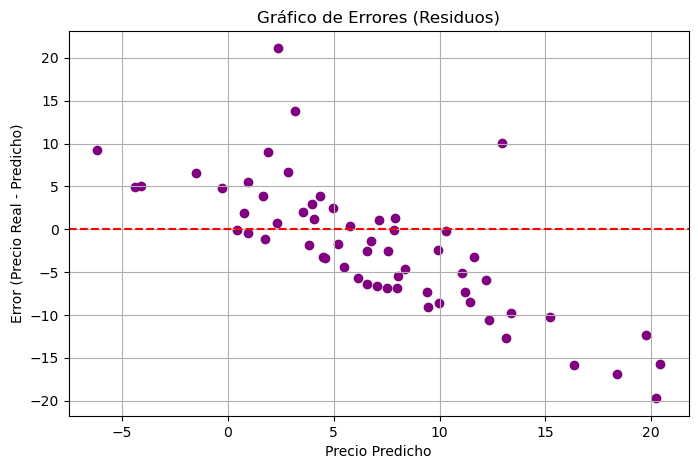

In [130]:
errores = y_test - y_pred

plt.figure(figsize=(8,5))
plt.scatter(y_pred, errores, color='purple')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel("Precio Predicho")
plt.ylabel("Error (Precio Real - Predicho)")
plt.title("Gráfico de Errores (Residuos)")
plt.grid(True)
plt.show()

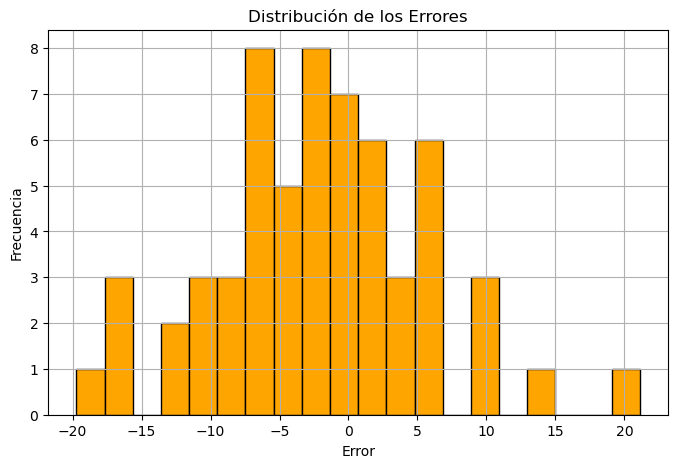

In [132]:
plt.figure(figsize=(8,5))
plt.hist(errores, bins=20, color='orange', edgecolor='black')
plt.title("Distribución de los Errores")
plt.xlabel("Error")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()